- 국가통계포털(KOSIS)

In [101]:
import pandas as pd
import numpy as np

In [102]:
data = pd.read_csv('data/보건복지부_공공보건 의료기관 현황_20161231_uft8.csv')
data

,연번,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
0,1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
1,2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
2,3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
3,4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
4,5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
223,217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
224,218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN
225,219,영동군립노인전문병원,시군구립,영동군립노인전문병원설치 및 운영조례,충청북도,해당없음,33280681,요양병원,120,29131,충청북도 영동군 영동읍 대학로 290,cmisilveryd.com,043-744-9633,043-742-8275,NaN


In [103]:
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).to_list(), columns=['시도', '구군']) # 문자열에서 공백을 기준으로 잘라서 리스트에 저장
addr['시도'].unique()


array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

- 가지고 온 데이터의 정체 작업 시작

In [104]:
# 잘못된 시도를 수정
addr[addr['시도'] == '창원시']

,시도,구군
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [105]:
addr.iloc[27] = ['경상님도', '창원시']
addr.iloc[31] = ['경상님도', '창원시']

In [106]:
addr[addr['시도'] == '경산시']

,시도,구군
47,경산시,경안로


In [107]:
addr.iloc[47] = ['경상북도', '경산시']

In [108]:
addr[addr['시도'] == '천안시']

,시도,구군
209,천안시,동남구
210,천안시,동남구


In [109]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청님도', '천안시']

In [110]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상님도', '경상남도', '경상북도', '경북', '인천광역시',
       '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도',
       '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시',
       '전북', '충청님도', '충청북도'], dtype=object)

In [111]:
addr_aliases = {'경기' : '경기도', '경남': '경상남도', '경북': '경상북도', '충북': '충청북도', 
                '충남': '충청남도', '전남': '전라남도', '전북': '전라북도', '서울시': '서울특별시', '부산시': '부산광역시',
                '대전시': '대전광역시', '강원도': '강원특별자치도'}

In [112]:
# 데이터프레임을 열로 가지고 오면 Series 형이 된다
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v, v))
addr['시도'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상님도', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '부산특별시', '충청남도', '울산광역시', '충청님도'], dtype=object)

- 가지고 온 데이터 정제 작업 끝

In [113]:
addr['구군'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [114]:
addr[addr['구군']=='아란13길']

,시도,구군
75,제주특별자치도,아란13길


In [115]:
addr.iloc[75] = ['제주특별자치구', '제주시']

In [116]:
addr[addr['구군'] == '동매로']

,시도,구군
155,부산광역시,동매로


In [117]:
addr.iloc[155] = ['부산광역시', '사하구']

In [118]:
addr['구군'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '사하구', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [119]:
# 대도시의 구 중에 남구 동구 서구 등등의 겹치는 것을 방지
# r : addr 데이터 프레임의 한행을 가지고 온다
addr['시도군구'] = addr.apply(lambda r:r['시도'] + ' ' + r['구군'], axis=1)    # axis=1 : 이부분을 빼는 값을 확인해보자!!!!!!!!
addr

,시도,구군,시도군구
0,강원특별자치도,춘천시,강원특별자치도 춘천시
1,강원특별자치도,삼척시,강원특별자치도 삼척시
2,강원특별자치도,영월군,강원특별자치도 영월군
3,강원특별자치도,원주시,강원특별자치도 원주시
4,강원특별자치도,강릉시,강원특별자치도 강릉시
...,...,...,...
222,충청북도,제천시,충청북도 제천시
223,충청북도,충주시,충청북도 충주시
224,충청북도,충주시,충청북도 충주시
225,충청북도,영동군,충청북도 영동군


In [120]:
addr['count'] = 0
addr

,시도,구군,시도군구,count
0,강원특별자치도,춘천시,강원특별자치도 춘천시,0
1,강원특별자치도,삼척시,강원특별자치도 삼척시,0
2,강원특별자치도,영월군,강원특별자치도 영월군,0
3,강원특별자치도,원주시,강원특별자치도 원주시,0
4,강원특별자치도,강릉시,강원특별자치도 강릉시,0
...,...,...,...,...
222,충청북도,제천시,충청북도 제천시,0
223,충청북도,충주시,충청북도 충주시,0
224,충청북도,충주시,충청북도 충주시,0
225,충청북도,영동군,충청북도 영동군,0


In [121]:
# as_index=False : 그룹한 데이터의 인덱스화를 방지 / 그룹화를 하면 시도가 인덱스화 된다. 이걸 방지
# 시도군구를 넣어서 원하는 데이터를 추출하는 것을 확인해보자!!!!!
# addr_groupby = pd.DataFrame(addr.groupby(['시도', '구군', '시도군구']).count())
# addr_groupby
addr_groupby = pd.DataFrame(addr.groupby(['시도', '구군', '시도군구'], as_index=False).count())
addr_groupby = addr_groupby.set_index('시도군구')
addr_groupby

,시도,구군,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [122]:
population = pd.read_excel('data/행정구역_시군구_별__성별_인구수_20230907141126_copy.xlsx')
population

,시도,군구,총인구수,남자인구수,여자인구수
0,서울특별시,소계,9409466,4554020,4855446
1,서울특별시,종로구,140032,67682,72350
2,서울특별시,중구,121482,58840,62642
3,서울특별시,용산구,216547,103993,112554
4,서울특별시,성동구,278750,135346,143404
...,...,...,...,...,...
273,경상남도,거창군,60184,29607,30577
274,경상남도,합천군,41531,20239,21292
275,제주특별자치도,소계,676489,338622,337867
276,제주특별자치도,제주시,492379,245974,246405


In [123]:
population['시도']

0        서울특별시
1        서울특별시
2        서울특별시
3        서울특별시
4        서울특별시
        ...   
273       경상남도
274       경상남도
275    제주특별자치도
276    제주특별자치도
277    제주특별자치도
Name: 시도, Length: 278, dtype: object

In [124]:
population['군구'].unique()

array(['소계', '\u3000\u3000\u3000종로구', '\u3000\u3000\u3000중구',
       '\u3000\u3000\u3000용산구', '\u3000\u3000\u3000성동구',
       '\u3000\u3000\u3000광진구', '\u3000\u3000\u3000동대문구',
       '\u3000\u3000\u3000중랑구', '\u3000\u3000\u3000성북구',
       '\u3000\u3000\u3000강북구', '\u3000\u3000\u3000도봉구',
       '\u3000\u3000\u3000노원구', '\u3000\u3000\u3000은평구',
       '\u3000\u3000\u3000서대문구', '\u3000\u3000\u3000마포구',
       '\u3000\u3000\u3000양천구', '\u3000\u3000\u3000강서구',
       '\u3000\u3000\u3000구로구', '\u3000\u3000\u3000금천구',
       '\u3000\u3000\u3000영등포구', '\u3000\u3000\u3000동작구',
       '\u3000\u3000\u3000관악구', '\u3000\u3000\u3000서초구',
       '\u3000\u3000\u3000강남구', '\u3000\u3000\u3000송파구',
       '\u3000\u3000\u3000강동구', '\u3000\u3000\u3000서구',
       '\u3000\u3000\u3000동구', '\u3000\u3000\u3000영도구',
       '\u3000\u3000\u3000부산진구', '\u3000\u3000\u3000동래구',
       '\u3000\u3000\u3000남구', '\u3000\u3000\u3000북구',
       '\u3000\u3000\u3000해운대구', '\u3000\u3000\u3000사하구',
       '\u3000\u3000\u300

In [125]:
population['군구'] = population['군구'].apply(lambda v:v.strip())
population['군구'].unique()

array(['소계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구',
       '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '군위군', '미추홀구',
       '연수구', '남동구', '부평구', '계양구', '강화군', '옹진군', '광산구', '유성구', '대덕구',
       '울주군', '세종시', '수원시', '장안구', '권선구', '팔달구', '영통구', '성남시', '수정구',
       '중원구', '분당구', '의정부시', '안양시', '만안구', '동안구', '부천시', '광명시', '평택시',
       '동두천시', '안산시', '상록구', '단원구', '고양시', '덕양구', '일산동구', '일산서구', '과천시',
       '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시', '처인구',
       '기흥구', '수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시',
       '포천시', '여주시', '연천군', '가평군', '양평군', '춘천시', '원주시', '강릉시', '동해시',
       '태백시', '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군',
       '화천군', '양구군', '인제군', '고성군', '양양군', '청주시', '서원구', '청원구', '상당구',
       '흥덕구', '

In [126]:
population = population.dropna()


In [127]:
population['시도군구'] = population.apply(lambda r:r['시도'] + ' ' + r['군구'], axis=1)
# population = population[population['구군'] != '전국']
# population = population[population['구군'] != '소계']
# population = population.set_index('시도군구')
population

,시도,군구,총인구수,남자인구수,여자인구수,시도군구
0,서울특별시,소계,9409466,4554020,4855446,서울특별시 소계
1,서울특별시,종로구,140032,67682,72350,서울특별시 종로구
2,서울특별시,중구,121482,58840,62642,서울특별시 중구
3,서울특별시,용산구,216547,103993,112554,서울특별시 용산구
4,서울특별시,성동구,278750,135346,143404,서울특별시 성동구
...,...,...,...,...,...,...
273,경상남도,거창군,60184,29607,30577,경상남도 거창군
274,경상남도,합천군,41531,20239,21292,경상남도 합천군
275,제주특별자치도,소계,676489,338622,337867,제주특별자치도 소계
276,제주특별자치도,제주시,492379,245974,246405,제주특별자치도 제주시


In [128]:
population = population[population['군구'] != '전국']
population = population[population['군구'] != '소계']
population = population.set_index('시도군구')
population

,시도,군구,총인구수,남자인구수,여자인구수
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,140032,67682,72350
서울특별시 중구,서울특별시,중구,121482,58840,62642
서울특별시 용산구,서울특별시,용산구,216547,103993,112554
서울특별시 성동구,서울특별시,성동구,278750,135346,143404
서울특별시 광진구,서울특별시,광진구,336446,161828,174618
...,...,...,...,...,...
경상남도 함양군,경상남도,함양군,37117,18013,19104
경상남도 거창군,경상남도,거창군,60184,29607,30577
경상남도 합천군,경상남도,합천군,41531,20239,21292


In [129]:
# addr_populationn = pd.merge(addr_groupby, population, how='inner') # how='inner' : 인덱스가 같은것끼리 조인을 하는 명령어
addr_populationn = pd.merge(addr_groupby, population, how='inner', left_index=True, right_index=True)
# 인덱스 값이 같은 것으로 join 된다. 나머지는 무시
# addr_populationn = pd.merge(addr_groupby, population, how='inner') 
addr_populationn

,시도_x,구군,count,시도_y,군구,총인구수,남자인구수,여자인구수
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,210122,104154,105968
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,88951,45203,43748
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,63086,32028,31058
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,82326,40773,41553
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,21255,11149,10106
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,27728,14119,13609
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,44436,22252,22184
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,130858,65791,65067


In [130]:
addr_population2 = addr_populationn[['시도_x', '군구_x', 'count', '총인구수']]
addr_population2

KeyError: "['군구_x'] not in index"

In [ ]:
# 컬럼이름 바꾸기
addr_population2 = addr_population2.rename(columns={'시도_x':'시도', '군구_x':'군구', '총인구수':'인구수'})
addr_population2

,시도,구군,count,인구수,ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,210122,1.903656
강원특별자치도 동해시,강원특별자치도,동해시,1,88951,1.124214
강원특별자치도 삼척시,강원특별자치도,삼척시,1,63086,1.585138
강원특별자치도 속초시,강원특별자치도,속초시,1,82326,1.214683
강원특별자치도 양구군,강원특별자치도,양구군,1,21255,4.704775
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27728,3.606463
충청북도 영동군,충청북도,영동군,1,44436,2.250428
충청북도 제천시,충청북도,제천시,1,130858,0.764187


In [ ]:
# count : 시도별 의료기관 수 
# 인구 100000 명당 공공의료기관이 얼마나 되는가를 계산(ratio : 비율)
addr_population2['ratio'] = addr_population2['count'].divide(addr_population2['인구수']) * 100000
addr_population2

,시도,구군,count,인구수,ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,210122,1.903656
강원특별자치도 동해시,강원특별자치도,동해시,1,88951,1.124214
강원특별자치도 삼척시,강원특별자치도,삼척시,1,63086,1.585138
강원특별자치도 속초시,강원특별자치도,속초시,1,82326,1.214683
강원특별자치도 양구군,강원특별자치도,양구군,1,21255,4.704775
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27728,3.606463
충청북도 영동군,충청북도,영동군,1,44436,2.250428
충청북도 제천시,충청북도,제천시,1,130858,0.764187


- 인구수별 의료기관 비율을 지도에 색깔을 넣어보자.
- 인구수별

In [ ]:
#index_col=0 : index 컬럼은 파일을 불러올때 인덱스를 쓴다는 의미
# x :가로 , y : 세로
data_draw_korea = pd.read_csv('data/data_draw_korea.csv', index_col=0) 
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군
227,790216,청주,6,12,932.51,충청북도,청주시


In [ ]:
data_draw_korea['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [ ]:
addr_aliases1 = {'강원도':'강원특별자치도'}
data_draw_korea['광역시도'] = data_draw_korea['광역시도'].apply(lambda v: addr_aliases1.get(v,v))
data_draw_korea
data_draw_korea['광역시도'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'], dtype=object)

In [ ]:
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] + " " + r['행정구역'], axis=1)
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,강원특별자치도 강릉시
1,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,강원특별자치도 고성군
2,86747,동해,11,5,180.01,강원특별자치도,동해시,강원특별자치도 동해시
3,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,강원특별자치도 삼척시
4,76733,속초,9,1,105.25,강원특별자치도,속초시,강원특별자치도 속초시
...,...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시,충청북도 제천시
225,34480,증평,6,11,81.84,충청북도,증평군,충청북도 증평군
226,62809,진천,5,11,406.08,충청북도,진천군,충청북도 진천군
227,790216,청주,6,12,932.51,충청북도,청주시,충청북도 청주시


- 블록맵 : 지도를 단순화해서 데이터를 보여주는데 효과적

In [ ]:
data_draw_korea = data_draw_korea.set_index('시도군구')

In [ ]:
# 왜 join = outer 인가?!!!!!!!!
# data_population = pd.merge(data_draw_korea, addr_population2, how='outer')
data_population = pd.merge(data_draw_korea, addr_population2, how='outer', left_index=True, right_index=True)
data_population = data_population.drop_duplicates(subset=['x', 'y'])
# data_population.to_excel('data/save/population.xlsx')

- BlockMap 그렬보자

In [ ]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [ ]:
# 한글서체
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager

sns.set(style='whitegrid') 

fontpath = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=fontpath).get_name() 
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12,9)

In [ ]:
def draw_blockMap(blockMap, targetData, title, color) :
    # print('blockMap 그리기')
    whitelabelmin = (max(blockMap[targetData] - min(blockMap[targetData])) * 0.25 + min(blockMap[targetData]))

    datalabel = targetData
    vmin = min(blockMap[targetData])
    vmax = max(blockMap[targetData])
    mapdata = blockMap.pivot(index='y', columns='x', values=targetData) # excel의 피벗테이블과 동일 : pivot
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)
    
    for idx, row in blockMap.iterrows() :
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종') :
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <=2 :
                dispname += row['행정구역'][-1]
        else :
            dispname = row['행정구역'][:-1]
        
        if len(dispname.splitlines()[-1])>=3 :
            fontsize, linespacing = 9.5, 1.5
        else :
            fontsize, linespacing = 11, 2.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize=fontsize, ha='center',
                 va='center', color=annocolor, linespacing=linespacing)
    for path in BORDER_LINES :
        # BORDER_LINES 안의 리스트를 열로 다시 행렬을 만듬
        # [(10,2),(2,2)] =(10,2),(2,2)
        ys, xs=zip(*path) 
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis() #y를 축으로 뒤집기
    plt.axis('off')

    cb = plt.colorbar(shrink=0.1, aspect=10)
    cb.set_label(datalabel)
    plt.tight_layout()
    plt.savefig('data/save/blockMap' + targetData + '.png')

    plt.show()


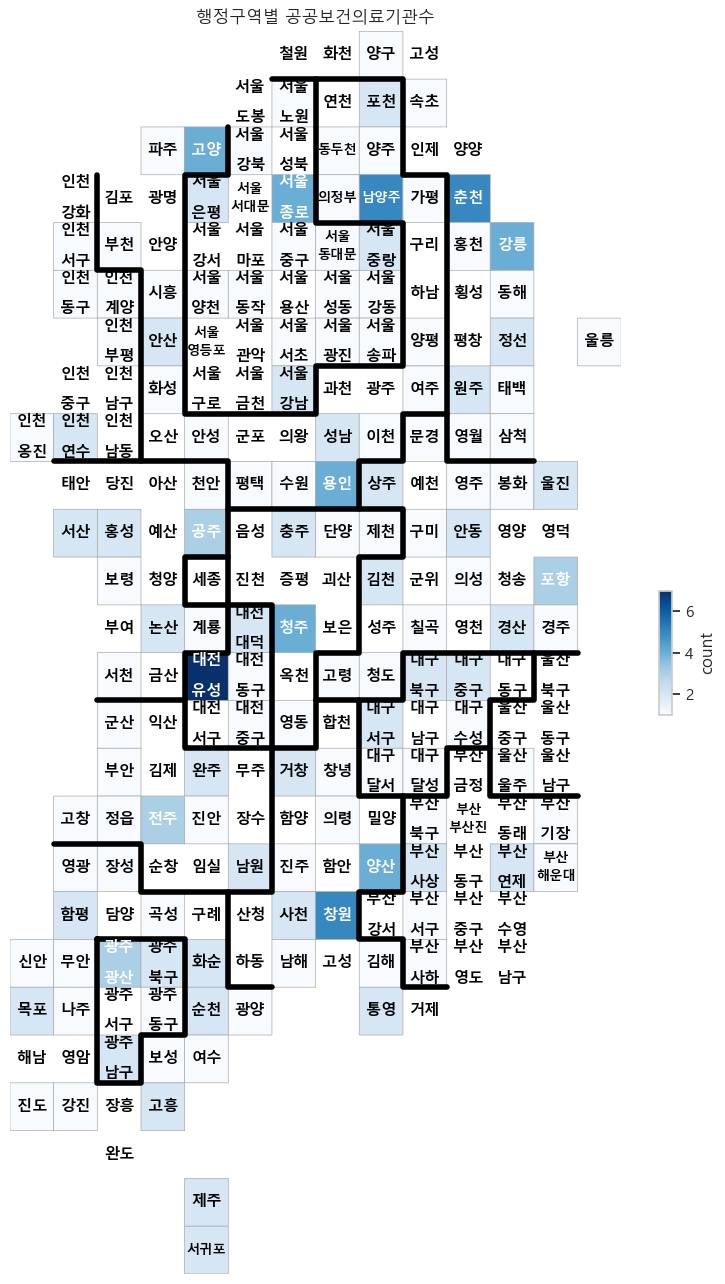

In [ ]:
draw_blockMap(data_population, 'count', '행정구역별 공공보건의료기관수', color='Blues')

In [ ]:
draw_blockMap(data_population, 'ratio', '행정구역별 인구수대비 공공보건으료기관비율', color='Blues')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''